## Load data

In [1]:
import sys
 
sys.path.insert(0, "../")

In [2]:
from dataAnalysis.data.Filter import Filter
import pandas as pd
from dataAnalysis.Constants import *
from dataAnalysis.DataAnalysis import DataAnalysis

data = pd.read_csv(r"../extdata/sbcdata.csv", header=0)
data_analysis = DataAnalysis(data, mimic_data = None)

/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [3]:
y_train = data_analysis.get_y_train()
X_train = data_analysis.get_X_train()

y_test = data_analysis.get_y_test()
X_test = data_analysis.get_X_test()

y_gw_test = data_analysis.get_y_gw()
X_gw_test = data_analysis.get_X_gw()

## Metrics definition

In [5]:
from dataAnalysis.Metrics import Evaluation

evaluation = Evaluation(y_test, y_gw_test, X_test, X_gw_test)

In [38]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot  as plt
def print_prc(classifier, y_test = y_test):
    y_score = classifier.predict_proba(X_test)[:, 1]
    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()

## Logistic regression

8.236319303512573
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.044219  0.776133  0.441226   0.008632  0.836916  0.009453
1  Greifswald  0.022229  0.592021  0.373617   0.003746  0.755808  0.004283


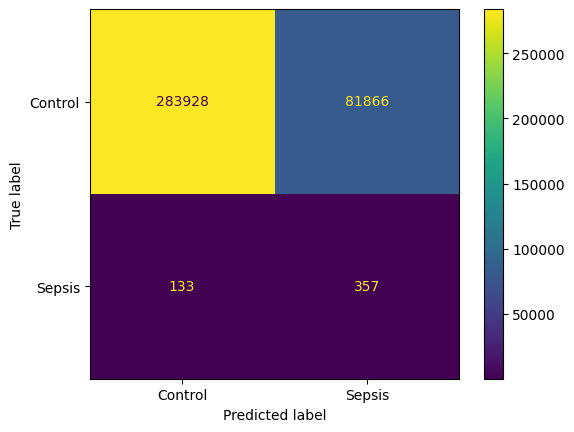

In [8]:
from sklearn.linear_model import LogisticRegression
import time
start = time.time()
logistic_regression = LogisticRegression(random_state=0, solver="liblinear", class_weight="balanced")
logistic_regression.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(logistic_regression))
evaluation.plot_confusion_matrix(logistic_regression)

## Decision Tree

3.873856544494629
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.044252  0.726204  0.424541   0.007894  0.849454  0.009056
1  Greifswald  0.027364  0.631928  0.389278   0.004322  0.787637  0.003666


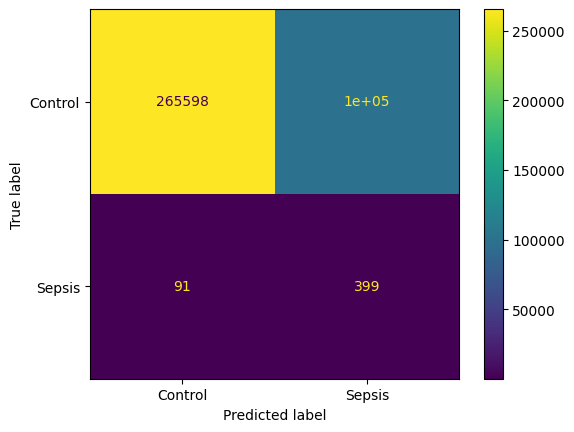

In [9]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
decision_tree = DecisionTreeClassifier(random_state=42, max_features=6, min_samples_leaf=0.005,
                       min_samples_split=0.03, class_weight="balanced")
decision_tree.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(decision_tree))
evaluation.plot_confusion_matrix(decision_tree)

## Random Forest

28.443543672561646
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.060526  0.885288  0.476936   0.014772  0.869844  0.015749
1  Greifswald  0.038818  0.842240  0.461016   0.007724  0.816980  0.005528
[0.12490871 0.0133425  0.05914138 0.53199013 0.07354019 0.0534699
 0.14360719]


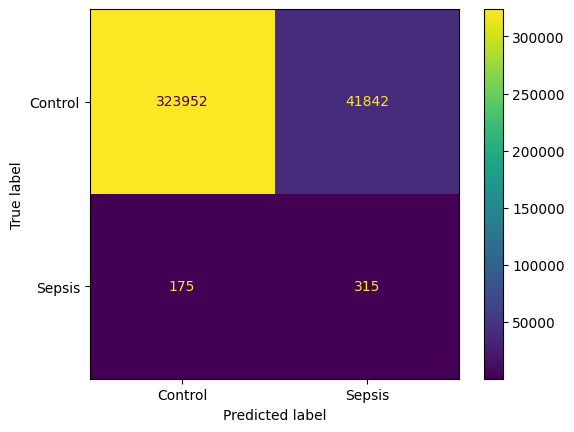

In [10]:
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42, n_jobs=-1)
random_forest.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(random_forest))
evaluation.plot_confusion_matrix(random_forest)
print(random_forest.feature_importances_)

## XG Boost

12.247741937637329
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.078705  0.980769  0.515829   0.041372  0.875481  0.018280
1  Greifswald  0.039413  0.959589  0.496704   0.014035  0.808292  0.006737


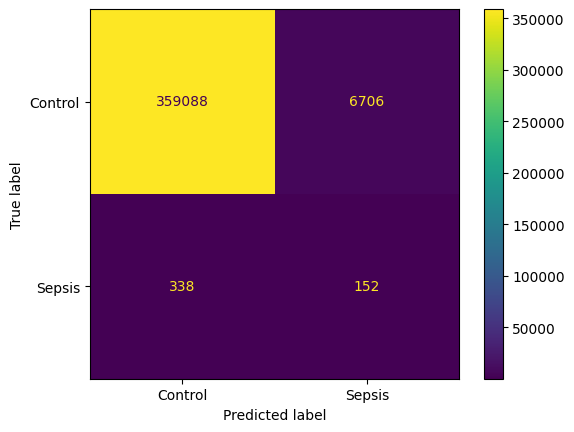

In [40]:
from xgboost import XGBClassifier

start = time.time()
xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = 70,
                           n_estimators=1000,
                           max_depth=2,
                           eta=0.1,
                           min_child_weight = 7,
                           max_delta_step= 7,
                           sampling_method= "uniform")
xgb_classifier.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(xgb_classifier))
evaluation.plot_confusion_matrix(xgb_classifier)

## RUS Boost

In [41]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
rus_boost = RUSBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=79, min_samples_leaf= 5, min_samples_split = 10),
                   learning_rate=0.90369, n_estimators=495,
                   random_state=1714400672, sampling_strategy=35/65)
rus_boost.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(rus_boost))
evaluation.plot_confusion_matrix(rus_boost)

/home/dwalke/.local/lib/python3.10/site-packages/imblearn/ensemble/_weight_boosting.py:271: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


KeyboardInterrupt: 

## Check relative position of false predcitions

In [11]:
test_df = data_analysis.get_testing_data()
test_df[SEX_COLUMN_NAME] = test_df[SEX_COLUMN_NAME].astype("category")
test_df[SEX_CATEGORY_COLUMN_NAME] = test_df[SEX_COLUMN_NAME].cat.codes
test_df[LABEL_COLUMN_NAME] = test_df[LABEL_COLUMN_NAME].astype('category')
X_test = test_df[FEATURES].values
y_test = (test_df.loc[:, LABEL_COLUMN_NAME].cat.codes).values

test_df["pred"] = random_forest.predict(X_test)
test_df["pred_proba"] = random_forest.predict_proba(X_test)[:,1]
test_df["y_test"] = y_test


In [12]:
test_df.sort_values(["Id", "Time"]).reset_index(drop=True)

,index,Id,Age,Sex,Diagnosis,Center,Set,Sender,Episode,Time,...,MCV,PCT,PLT,RBC,WBC,Label,SexCategory,pred,pred_proba,y_test
0,2180943,583815,77,M,Control,Leipzig,Validation,AMB,1,0.0,...,97.3,NaN,199.0,4.01,8.8,Control,0,0,0.239445,0
1,2180944,583816,57,M,Control,Leipzig,Validation,GEN,1,0.0,...,90.4,NaN,213.0,4.79,8.3,Control,0,0,0.060139,0
2,2180945,583817,77,M,Control,Leipzig,Validation,AMB,1,0.0,...,92.6,NaN,190.0,4.72,9.0,Control,0,0,0.135738,0
3,2180946,583818,81,M,Control,Leipzig,Validation,ED,1,360.0,...,72.9,NaN,299.0,2.58,8.0,Control,0,0,0.438295,0
4,2180947,583818,81,M,Control,Leipzig,Validation,GEN,1,52680.0,...,73.3,NaN,310.0,3.11,8.1,Control,0,0,0.260932,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366279,2709537,778980,56,M,Sepsis,Leipzig,Validation,GEN,1,354780.0,...,97.5,NaN,134.0,3.18,7.0,Control,0,0,0.323827,0
366280,2709538,778980,56,M,Sepsis,Leipzig,Validation,GEN,1,606720.0,...,96.6,NaN,121.0,3.20,7.2,Control,0,0,0.372143,0
366281,2709539,778980,56,M,Sepsis,Leipzig,Validation,GEN,1,870420.0,...,93.2,NaN,114.0,3.07,8.3,Control,0,1,0.538459,0
366282,2709540,778980,56,M,Sepsis,Leipzig,Validation,GEN,1,888540.0,...,91.1,NaN,149.0,3.14,6.5,Sepsis,0,0,0.219763,1


In [59]:
import numpy as np

sorted_df = test_df.sort_values(["Id", "Time"]).reset_index(drop=True)
uniques, counts = np.unique(sorted_df["Id"].values, return_counts=True)

print(uniques)
print(counts)
rel_counter = []
abs_counter = []
for count in counts:
    if count != 1:
        rel_counter.extend((np.arange(count) / (count-1)))
        abs_counter.extend(np.arange(count))
    if count == 1:
        rel_counter.extend([-1])
        abs_counter.extend([-1])
sorted_df["rel_counter"] = rel_counter
sorted_df["abs_counter"] = abs_counter

[583815 583816 583817 ... 778978 778979 778980]
[1 1 1 ... 2 3 7]


In [173]:
sorted_df_with_sequences = sorted_df[sorted_df["rel_counter"] != -1]
sorted_df_with_sequences[sorted_df_with_sequences["pred"] != sorted_df_with_sequences["y_test"]]["rel_counter"].describe().to_frame() ## false predictions mostly in the middle

,rel_counter
count,678732.000000
mean,0.498528
std,0.383193
min,0.000000
25%,0.083333
50%,0.500000
75%,0.909091
max,1.000000


## Position rolling to check whether first n or last n positions can be good classified

In [100]:
sorted_df = pd.concat((data_analysis.get_training_data(), data_analysis.get_testing_data())).sort_values(["Id", "Time"]).reset_index(drop=True)
uniques, counts = np.unique(sorted_df["Id"].values, return_counts=True)

print(uniques)
print(counts)
rel_counter = []
abs_counter = []
for count in counts:
    if count != 1:
        rel_counter.extend((np.arange(count) / (count-1)))
        abs_counter.extend(np.arange(count))
    if count == 1:
        rel_counter.extend([-1])
        abs_counter.extend([-1])
sorted_df["rel_counter"] = rel_counter
sorted_df["abs_counter"] = abs_counter

[     1      2      3 ... 778978 778979 778980]
[1 1 1 ... 2 3 7]


In [102]:
sorted_df = sorted_df.copy()

In [185]:
def get_specific_positions(set_name = "Validation", is_first = True):
    n = 3
    sorted_test_df =  sorted_df
    origin_id = sorted_test_df["Id"].values
    positions_mask = np.logical_or(sorted_test_df["abs_counter"] <= n, sorted_test_df["abs_counter"] == -1) if is_first else sorted_test_df["rel_counter"] >= 1


    sex_category = sorted_test_df.loc[:, SEX_COLUMN_NAME].astype("category")
    sex_categories = sex_category.cat.codes
    sorted_df.loc[:, SEX_CATEGORY_COLUMN_NAME] = sex_categories
    
    labels = sorted_test_df.loc[:, LABEL_COLUMN_NAME].astype('category').cat.codes
    sorted_test_df.loc[:, LABEL_COLUMN_NAME] = labels

    data_positions = sorted_test_df[positions_mask]
    
    mask = np.logical_and(sorted_test_df["Set"] == set_name, sorted_test_df["Center"] == "Leipzig")
    X_test_positions = data_positions.loc[mask, FEATURES].values
    y_test_positions = data_positions.loc[mask, LABEL_COLUMN_NAME].values
    return X_test_positions, y_test_positions

X_test_positions, y_test_positions = get_specific_positions("Validation", True)
X_train_positions, y_train_positions = get_specific_positions("Training", True)

In [186]:
X_test_positions.shape

(287451, 7)

In [187]:
X_train_positions.shape

(822572, 7)

,Name,MCC,F1-Micro,F1-Macro,F1-Binary,AUROC,AUPRC
0,Leipzig,0.078213,0.921576,0.490933,0.022716,0.893507,0.021307
1,Greifswald,0.078213,0.921576,0.490933,0.022716,0.893507,0.021307


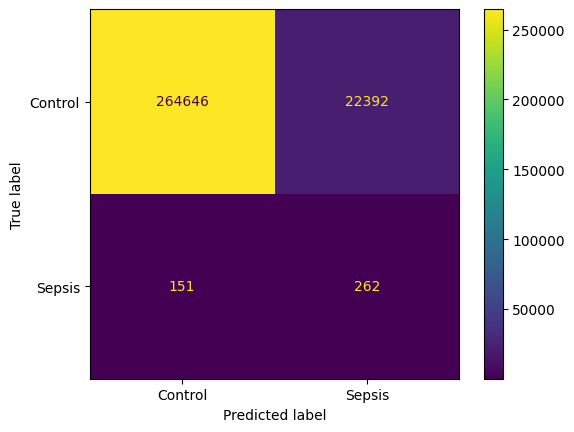

In [188]:
from dataAnalysis.Metrics import Evaluation

clf = random_forest

evaluation_red = Evaluation(y_test_positions, y_test_positions, X_test_positions, X_test_positions)
evaluation_red.plot_confusion_matrix(clf)
evaluation_red.get_df_metrics(clf)

         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.090737   0.98383  0.522217   0.052589  0.899502  0.023732
1  Greifswald  0.090737   0.98383  0.522217   0.052589  0.899502  0.023732


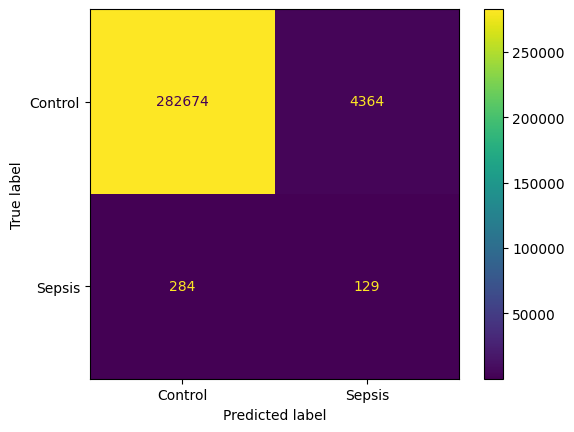

In [189]:
from dataAnalysis.Metrics import Evaluation

clf = xgb_classifier

evaluation_red = Evaluation(y_test_positions, y_test_positions, X_test_positions, X_test_positions)
print(evaluation_red.get_df_metrics(clf))
evaluation_red.plot_confusion_matrix(clf)